Evolución de los Precios de la Electricidad
===

# Instrucciones

En el archivo `precios.zip`  se encuentran los archivos `Precio_Bolsa_Nacional_($kwh)_ano.xls` en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada realice las siguientes actividades. 

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Debe transformar la tabla de tal forma que quede con las columnas `Fecha`, `Hora` y `Precio` (únicamente tres columnas).

In [19]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime as dt
import glob

%matplotlib inline

In [20]:
def leer_precios(filename):
    for i in range(10):
        DataFrame = pd.read_excel(filename,skiprows = i ,usecols = list(range(25)))
        if DataFrame.iloc[0,0] == 'Fecha':
            DataFrame = pd.read_excel(filename,skiprows = i+1, usecols = list(range(25)))
            break
    return DataFrame

In [21]:
filenames = !ls precios/*.xls*
DataFrames = []
for filename in filenames:
    DataFrames.append(leer_precios(filename))
DataFrames = pd.concat(DataFrames)
DataFrames = pd.melt(DataFrames,id_vars = 'Fecha')
DataFrames.columns = ['Fecha','Hora','Precio']
DataFrames.columns

Index(['Fecha', 'Hora', 'Precio'], dtype='object')

In [14]:
#df = pd.read_excel('precios/Precio_Bolsa_Nacional_($kwh)_1996.xlsx', 
 #                      skiprows=2, 
  #                     usecols = list(range(26)))
#df.iloc[0,0]

In [15]:
# def leer_precios(filename):
#     for k in range(10):
#         df = pd.read_excel(filename,
#                            skiprows = k,
#                            usecols = list(range(26)))
#         if df.iloc[0,0] == 'Fecha':
#             df = pd.read_excel(filename,
#                                skiprows = k+1,
#                                usecols = list(range(26)))
#             break
        
#     return(df)

In [3]:
# filenames = !ls precios/
# dfs = []
# for filename in filenames:
#     dfs.append(leer_precios("precios/"+filename))
# dfs = pd.concat(dfs)
# dfs.size

In [4]:
# dfs1 = pd.melt(dfs,id_vars='Fecha')
# dfs1

In [5]:
# dfs1.columns

**2.--** Compute e imprima el número de registros con datos faltantes.

In [22]:
# DataFrames.isnull().sum().sum()

454

In [23]:
df1 = DataFrames.dropna()
DataFrames.shape[0] - df1.shape[0]

238

**3.--** Compute e imprima el número de registros duplicados.

In [39]:
noRepeated = DataFrames.copy()
noRepeated = noRepeated.drop_duplicates()
repeated =  len(DataFrames.index) - len(noRepeated.index)
repeated

1951

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [44]:
noRepeated = noRepeated.dropna()
len(noRepeated.index)

199819

**5.--** Compute y grafique el precio primedio diario.

In [45]:
# Recordatorio SIEMPRE TRABAJAR SOBRE UNA COPIA DEL DATAFRAME...

In [67]:
df2 = DataFrames.copy()
df2['dia'] = pd.DatetimeIndex(df2['Fecha']).day
df2['mes'] = pd.DatetimeIndex(df2['Fecha']).month

In [68]:
x = df2.groupby('dia')['Precio'].mean()

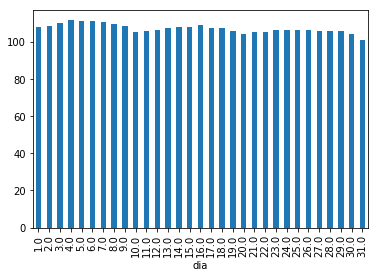

In [69]:
x.plot(kind="bar")

**6.--** Compute y grafique el precio máximo por mes.

In [70]:
y = df2.groupby('mes')['Precio'].min()

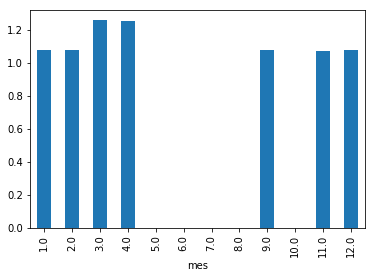

In [74]:
y.plot(kind="bar")

**7.--** Compute y grafique el precio mínimo mensual.

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

---